In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= 1e-3
wd=1e-4
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


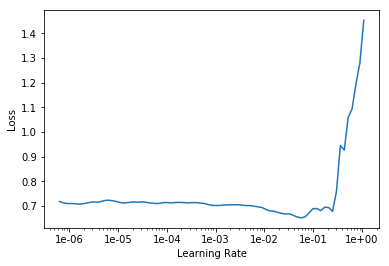

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.647312    0.600304    0.714976  (00:00)
2      0.571616    0.491420    0.768116  (00:01)
3      0.549112    0.486152    0.758454  (00:00)
4      0.501835    0.449645    0.782609  (00:01)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:39
epoch  train_loss  valid_loss  accuracy
1      0.481964    0.373677    0.826087  (00:02)
2      0.468082    0.327949    0.855072  (00:02)
3      0.406216    0.336950    0.850242  (00:02)
4      0.383843    0.283137    0.874396  (00:02)
5      0.364588    0.269059    0.874396  (00:01)
6      0.335539    0.312022    0.840580  (00:01)
7      0.348327    0.274033    0.874396  (00:01)
8      0.348954    0.314907    0.855072  (00:01)
9      0.301885    0.294535    0.850242  (00:01)
10     0.262381    0.334662    0.874396  (00:02)
11     0.240528    0.296278    0.884058  (00:02)
12     0.278103    0.282628    0.888889  (00:01)
13     0.252872    0.277110    0.888889  (00:01)
14     0.261737    0.318595    0.884058  (00:02)
15     0.260917    0.277163    0.893720  (00:01)
16     0.278394    0.276659    0.888889  (00:01)
17     0.316045    0.253558    0.893720  (00:01)
18     0.272725    0.257613    0.888889  (00:01)
19     0.227608    0.299761    0.869565  (00:01)
20     0.19

In [12]:
learn.validate()

[0.30075324, tensor(0.8647)]

In [13]:
accuracy_list.append(learn.validate()[1].item())

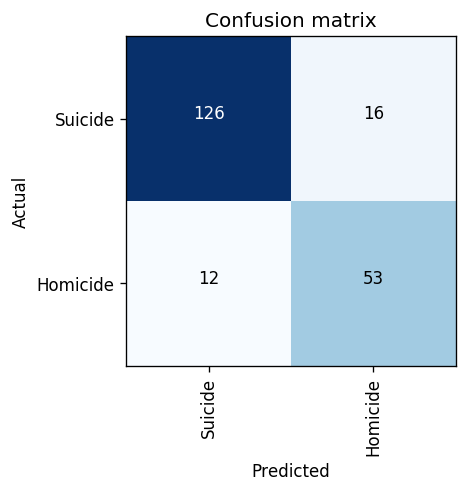

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

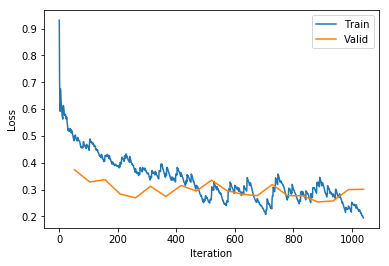

In [15]:
learn.recorder.plot_losses()

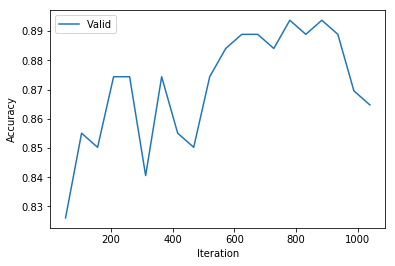

In [16]:
learn.recorder.plot_metrics()

In [17]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


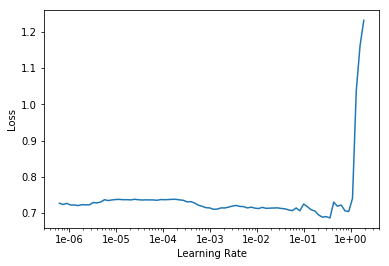

In [19]:
learn.recorder.plot()

In [20]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.624995    0.550893    0.743961  (00:00)
2      0.572489    0.501441    0.787440  (00:00)
3      0.545750    0.437979    0.811594  (00:01)
4      0.513743    0.425414    0.797101  (00:00)



In [21]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:42
epoch  train_loss  valid_loss  accuracy
1      0.475588    0.393453    0.811594  (00:02)
2      0.469754    0.350324    0.850242  (00:02)
3      0.405187    0.299129    0.859903  (00:02)
4      0.411056    0.324460    0.840580  (00:02)
5      0.381717    0.264161    0.879227  (00:02)
6      0.301966    0.280972    0.869565  (00:02)
7      0.340782    0.290022    0.884058  (00:01)
8      0.275715    0.307240    0.879227  (00:02)
9      0.257716    0.254920    0.898551  (00:02)
10     0.255289    0.328399    0.859903  (00:01)
11     0.220368    0.283196    0.898551  (00:02)
12     0.307513    0.297243    0.879227  (00:01)
13     0.259778    0.266162    0.888889  (00:02)
14     0.238704    0.267603    0.888889  (00:02)
15     0.232802    0.234445    0.898551  (00:01)
16     0.224438    0.330976    0.869565  (00:02)
17     0.216455    0.311008    0.859903  (00:02)
18     0.192568    0.299894    0.879227  (00:02)
19     0.174663    0.272428    0.884058  (00:02)
20     0.16

In [22]:
learn.validate()

[0.29623216, tensor(0.8937)]

In [23]:
accuracy_list.append(learn.validate()[1].item())

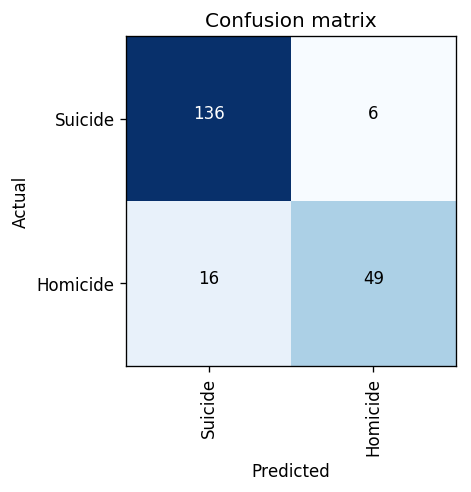

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

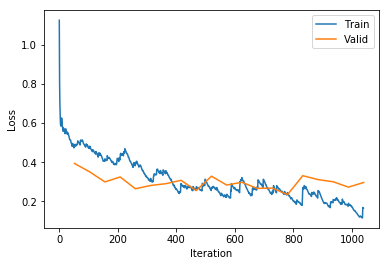

In [25]:
learn.recorder.plot_losses()

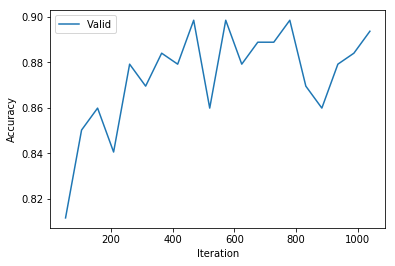

In [26]:
learn.recorder.plot_metrics()

In [27]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [28]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


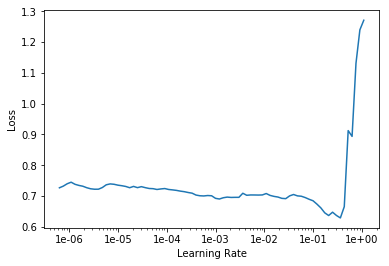

In [29]:
learn.recorder.plot()

In [30]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.571904    0.561636    0.768116  (00:00)
2      0.577369    0.533771    0.743961  (00:00)
3      0.550057    0.507814    0.743961  (00:01)
4      0.557698    0.583326    0.724638  (00:00)



In [31]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:39
epoch  train_loss  valid_loss  accuracy
1      0.547105    0.449710    0.801932  (00:01)
2      0.504189    0.384856    0.826087  (00:01)
3      0.449921    0.308643    0.884058  (00:02)
4      0.439821    0.285222    0.884058  (00:02)
5      0.425980    0.274177    0.859903  (00:01)
6      0.346692    0.244860    0.903382  (00:02)
7      0.356922    0.248967    0.874396  (00:01)
8      0.314711    0.288571    0.869565  (00:01)
9      0.330839    0.245963    0.874396  (00:01)
10     0.273698    0.271772    0.879227  (00:01)
11     0.316593    0.283970    0.898551  (00:01)
12     0.279938    0.261536    0.898551  (00:01)
13     0.260642    0.251700    0.879227  (00:01)
14     0.236199    0.228590    0.893720  (00:02)
15     0.227381    0.216998    0.893720  (00:02)
16     0.266336    0.248848    0.888889  (00:01)
17     0.293762    0.198259    0.913043  (00:01)
18     0.220464    0.242755    0.893720  (00:02)
19     0.248183    0.236780    0.879227  (00:01)
20     0.19

In [32]:
learn.validate()

[0.24508117, tensor(0.9034)]

In [33]:
accuracy_list.append(learn.validate()[1].item())

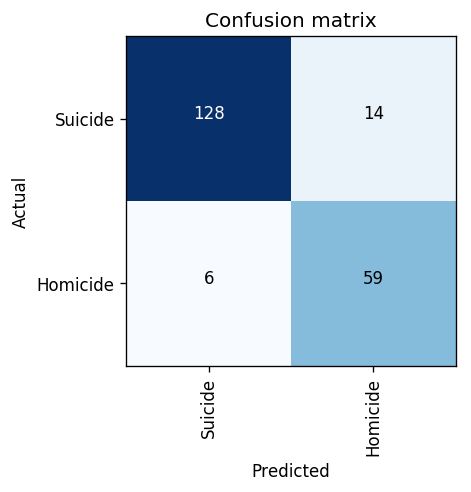

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

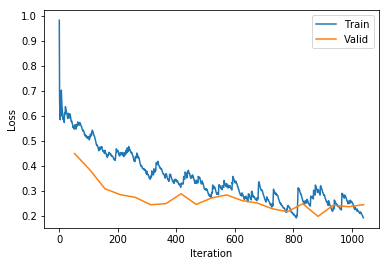

In [35]:
learn.recorder.plot_losses()

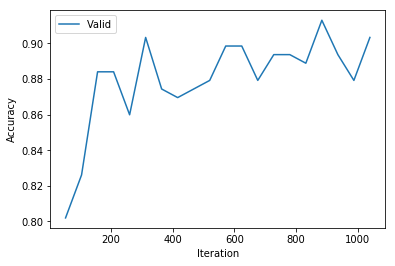

In [36]:
learn.recorder.plot_metrics()

In [37]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [38]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


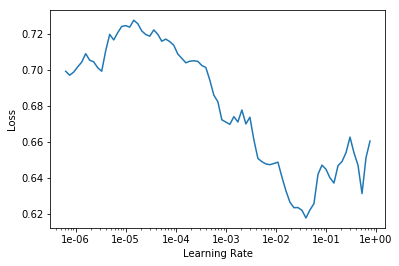

In [39]:
learn.recorder.plot()

In [40]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.612810    0.536491    0.758454  (00:01)
2      0.573028    0.517904    0.763285  (00:00)
3      0.586952    0.544424    0.739130  (00:00)
4      0.535259    0.485416    0.777778  (00:00)



In [41]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:40
epoch  train_loss  valid_loss  accuracy
1      0.591582    0.458323    0.782609  (00:01)
2      0.534712    0.448933    0.801932  (00:01)
3      0.421970    0.299991    0.859903  (00:02)
4      0.374964    0.320044    0.850242  (00:02)
5      0.374143    0.277964    0.893720  (00:01)
6      0.334215    0.265047    0.898551  (00:02)
7      0.293250    0.265303    0.884058  (00:02)
8      0.243351    0.264923    0.879227  (00:02)
9      0.288110    0.275276    0.869565  (00:01)
10     0.277690    0.264989    0.893720  (00:01)
11     0.254212    0.278977    0.893720  (00:02)
12     0.270617    0.257820    0.903382  (00:01)
13     0.277840    0.287719    0.884058  (00:01)
14     0.296516    0.305361    0.893720  (00:01)
15     0.247511    0.239049    0.893720  (00:02)
16     0.261206    0.214861    0.922705  (00:01)
17     0.255052    0.304872    0.864734  (00:01)
18     0.226360    0.290756    0.898551  (00:02)
19     0.228171    0.268878    0.884058  (00:01)
20     0.19

In [42]:
learn.validate()

[0.3368988, tensor(0.8599)]

In [43]:
accuracy_list.append(learn.validate()[1].item())

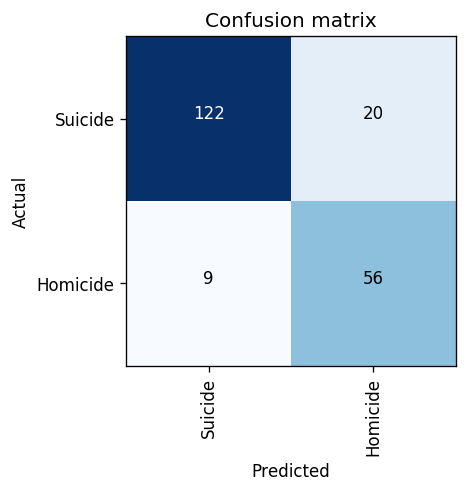

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

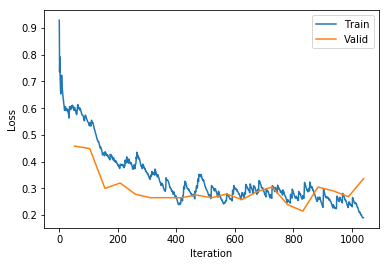

In [45]:
learn.recorder.plot_losses()

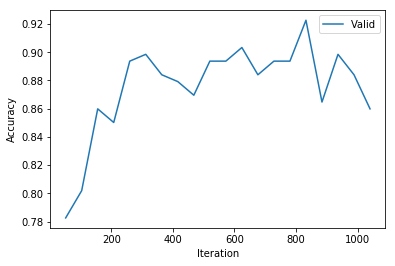

In [46]:
learn.recorder.plot_metrics()

In [47]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [48]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


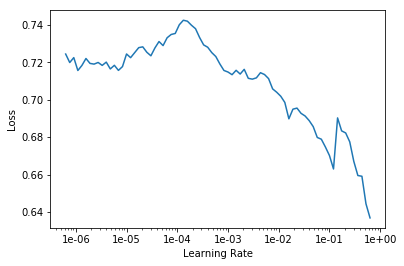

In [49]:
learn.recorder.plot()

In [50]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.664251    0.611350    0.705314  (00:00)
2      0.621211    0.540011    0.748792  (00:00)
3      0.581997    0.538537    0.758454  (00:00)
4      0.553540    0.502479    0.748792  (00:00)



In [51]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:41
epoch  train_loss  valid_loss  accuracy
1      0.492773    0.405238    0.830918  (00:02)
2      0.443043    0.365555    0.874396  (00:02)
3      0.431970    0.358289    0.855072  (00:02)
4      0.422852    0.306943    0.869565  (00:01)
5      0.382163    0.316430    0.850242  (00:02)
6      0.360268    0.275081    0.908213  (00:02)
7      0.316195    0.246832    0.888889  (00:02)
8      0.310610    0.306041    0.884058  (00:02)
9      0.289099    0.288233    0.869565  (00:02)
10     0.266972    0.292254    0.884058  (00:02)
11     0.276786    0.318454    0.864734  (00:01)
12     0.288256    0.293537    0.874396  (00:01)
13     0.312749    0.427025    0.888889  (00:02)
14     0.241572    0.287387    0.879227  (00:02)
15     0.295346    0.274724    0.888889  (00:01)
16     0.244159    0.299657    0.864734  (00:02)
17     0.208209    0.280301    0.888889  (00:02)
18     0.191327    0.242819    0.903382  (00:02)
19     0.219064    0.285284    0.888889  (00:01)
20     0.21

In [52]:
learn.validate()

[0.25123858, tensor(0.9082)]

In [53]:
accuracy_list.append(learn.validate()[1].item())

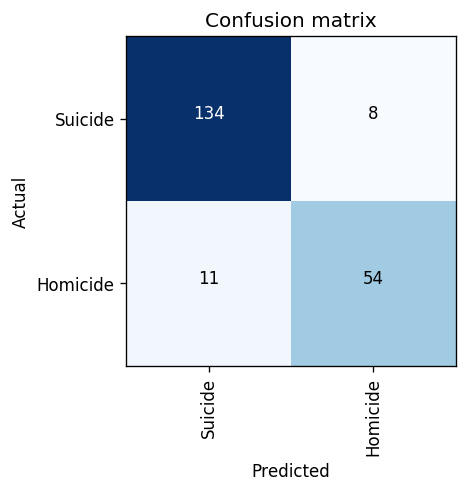

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

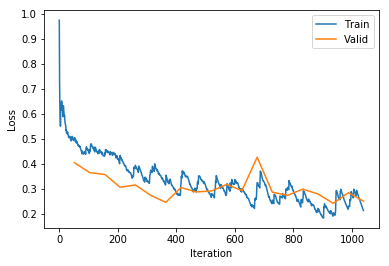

In [55]:
learn.recorder.plot_losses()

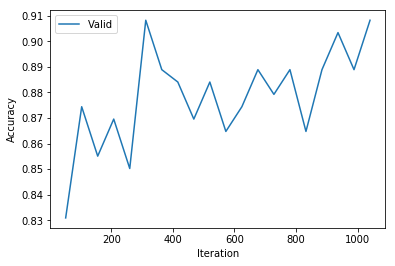

In [56]:
learn.recorder.plot_metrics()

In [57]:
print(accuracy_list)

[0.8647342920303345, 0.8937197923660278, 0.9033816456794739, 0.8599033951759338, 0.9082125425338745]


In [58]:
print(sum(accuracy_list)/len(accuracy_list))

0.8859903335571289


In [59]:
#We are now done doing 5-fold cross validation 

In [60]:
#Now train with all the training data and evaluate with the test data

In [61]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [62]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [63]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.628231    0.539940    0.756757  (00:01)
2      0.526050    0.443779    0.830116  (00:01)
3      0.541582    0.443953    0.799228  (00:01)
4      0.536342    0.446901    0.853282  (00:01)



In [64]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:50
epoch  train_loss  valid_loss  accuracy
1      0.513846    0.336082    0.864865  (00:02)
2      0.464334    0.289917    0.880309  (00:02)
3      0.437322    0.255648    0.903475  (00:02)
4      0.370665    0.260964    0.907336  (00:02)
5      0.324274    0.231202    0.911197  (00:02)
6      0.354826    0.232966    0.891892  (00:02)
7      0.344204    0.230141    0.915058  (00:02)
8      0.283478    0.204536    0.915058  (00:02)
9      0.360964    0.208613    0.922780  (00:02)
10     0.304821    0.183028    0.926641  (00:02)
11     0.336974    0.201598    0.918919  (00:02)
12     0.266970    0.197517    0.926641  (00:02)
13     0.265594    0.203342    0.911197  (00:02)
14     0.285787    0.198170    0.918919  (00:02)
15     0.248171    0.193070    0.922780  (00:02)
16     0.209552    0.232450    0.907336  (00:02)
17     0.312697    0.209391    0.899614  (00:02)
18     0.218939    0.233188    0.915058  (00:02)
19     0.227026    0.227800    0.911197  (00:02)
20     0.26

In [65]:
learn.validate()

[0.22025388, tensor(0.9112)]

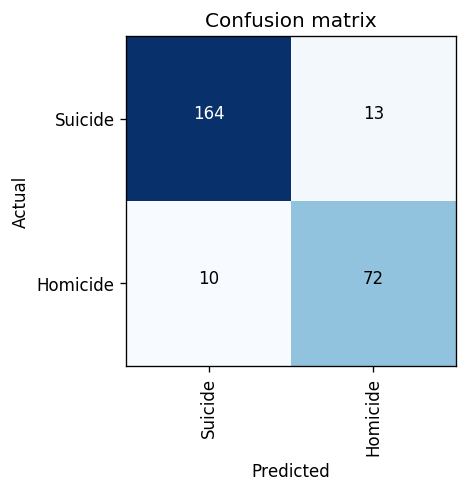

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [67]:
import torch

torch.cuda.empty_cache()